
# **Importação do Drive com os arquivos**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# **Importação inicial das bibliotecas**


####Fazer a importação das bibliotecas



In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
import math
import re
import os
import pandas as pd
from bs4 import BeautifulSoup
import random
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## - Data Preprocessing

In [ ]:
def read_and_concatenate_dataframes(directory, new_column_name, value):
    """
    Read JSONL files in the specified directory, add a new column to each DataFrame,
    and concatenate all DataFrames into a single DataFrame.

    Parameters:
    - directory: The path to the directory containing JSONL files.
    - new_column_name: The name of the new column to be added.
    - value: The value to be assigned to the new column.

    Returns:
    A DataFrame containing all the concatenated data.
    """

    # List to store DataFrames
    data_frames_list = []

    # Iterate over files in the directory
    for file_name in os.listdir(directory):
        if file_name.endswith('.jsonl'):
            file_path = os.path.join(directory, file_name)

            # Read the JSONL file and add to the DataFrame list
            temp_df = pd.read_json(file_path, lines=True, encoding='latin1')

            # Add a new column with specified name and value
            temp_df[new_column_name] = value

            data_frames_list.append(temp_df)

    # Concatenate all DataFrames into a single DataFrame
    result_df = pd.concat(data_frames_list, ignore_index=True)

    return result_df

# Example usage
directory_pathG = '/content/drive/MyDrive/opengpttext-clean/chatgpt/'
directory_pathH = '/content/drive/MyDrive/opengpttext-clean/openweb/'
new_column = 'value'

# Call the function with value 1 for GPT data and value 0 for human data
data_gpt = read_and_concatenate_dataframes(directory_pathG, new_column, value=1)
data_human = read_and_concatenate_dataframes(directory_pathH, new_column, value=0)

In [ ]:
data_human

,uid,text,value
0,[urlsf_subset00]-[83],Check current weather conditions\nIt's going t...,0
1,[urlsf_subset00]-[89],"On Thursday, the president of the United State...",0
2,[urlsf_subset00]-[390],Curitiba -\nEl delantero Enner Valencia marco ...,0
3,[urlsf_subset00]-[457],Getting started\n(I'm using Windows 10)\nAfter...,0
4,[urlsf_subset00]-[458],"Today, Mexico's newest data retention law ente...",0
...,...,...,...
29137,[urlsf_subset09]-[389268],Academic freedom -- for conservatives -- died ...,0
29138,[urlsf_subset09]-[389288],When Dylan Higgins invited me on to the Field ...,0
29139,[urlsf_subset09]-[389386],John Kasich. AP Photo/John Minchillo\nJohn Kas...,0
29140,[urlsf_subset09]-[389484],A Navy-funded thermal engine bobbing off the c...,0


In [ ]:
data_gpt

,uid,text,value
0,[urlsf_subset01]-[362358],The US is to review its military support for S...,1
1,[urlsf_subset01]-[116340],Some game developers are seeking inspiration f...,1
2,[urlsf_subset01]-[299487],IntercontinentalExchange's acquisition of the ...,1
3,[urlsf_subset01]-[137018],According to research from The University of W...,1
4,[urlsf_subset01]-[302038],The Davao City Council has declared comedian R...,1
...,...,...,...
29390,[urlsf_subset05]-[141028],"The article ""Creative underexposure with a Nik...",1
29391,[urlsf_subset05]-[49964],The special education services that New York S...,1
29392,[urlsf_subset05]-[116459],"During the third week of the trial, two opposi...",1
29393,[urlsf_subset05]-[67867],"Mogwai Young Team, the debut studio album by S...",1


In [ ]:
data_human.shape

(29142, 3)

In [ ]:
data_gpt.shape

(29395, 3)

In [ ]:
# Concatenar os DataFrames em uma única variável
combined_data = pd.concat([data_gpt, data_human], ignore_index=True)
combined_data = combined_data.drop(combined_data.columns[0], axis=1)

In [ ]:
combined_data

,text,value
0,The US is to review its military support for S...,1
1,Some game developers are seeking inspiration f...,1
2,IntercontinentalExchange's acquisition of the ...,1
3,According to research from The University of W...,1
4,The Davao City Council has declared comedian R...,1
...,...,...
58532,Academic freedom -- for conservatives -- died ...,0
58533,When Dylan Higgins invited me on to the Field ...,0
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,0
58535,A Navy-funded thermal engine bobbing off the c...,0


In [ ]:
combined_data.head()

,text,value
0,The US is to review its military support for S...,1
1,Some game developers are seeking inspiration f...,1
2,IntercontinentalExchange's acquisition of the ...,1
3,According to research from The University of W...,1
4,The Davao City Council has declared comedian R...,1


In [ ]:
combined_data.tail()

,text,value
58532,Academic freedom -- for conservatives -- died ...,0
58533,When Dylan Higgins invited me on to the Field ...,0
58534,John Kasich. AP Photo/John Minchillo\nJohn Kas...,0
58535,A Navy-funded thermal engine bobbing off the c...,0
58536,A U.S. Army Black Hawk helicopter is seen. (Ph...,0


# **- Métricas de Análise do DataSet**



### **Cálculo do comprimento dos Textos**


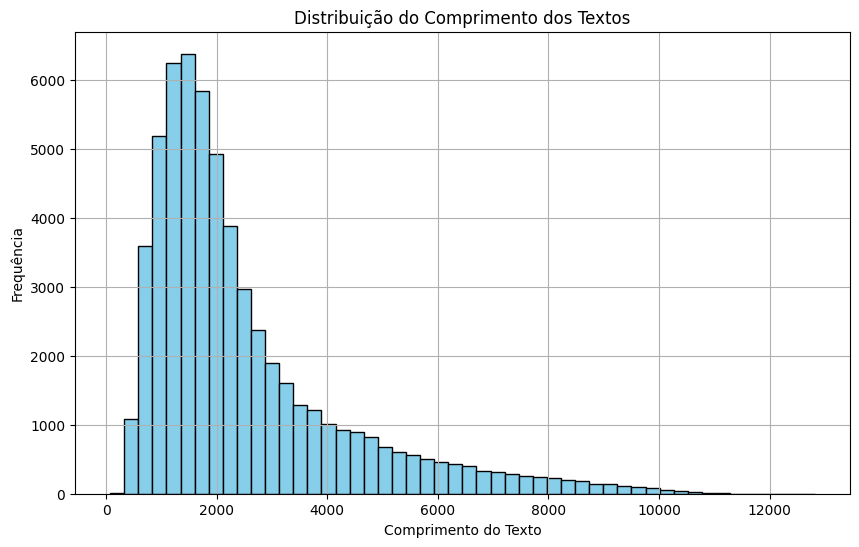

In [ ]:
text_data = pd.DataFrame({
    'text': combined_data['text'],
    'text_length': combined_data['text'].apply(len)
})

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.hist(text_data['text_length'], bins=50, color='skyblue', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.title('Distribuição do Comprimento dos Textos')

# Mostra o gráfico
plt.grid(True)
plt.show()


### **Cálculo da diversidade vocabular de um texto**


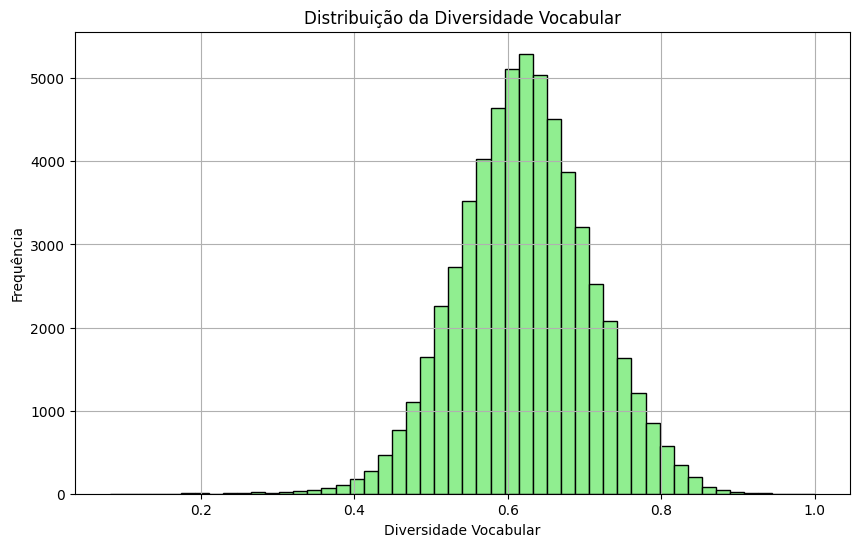

In [ ]:
def calculate_vocab_diversity(text):
    tokens = text.split()  # Divide o texto em tokens (palavras)
    unique_tokens = set(tokens)  # Obtém apenas os tokens únicos
    num_tokens = len(tokens)  # Conta o número total de tokens
    num_unique_tokens = len(unique_tokens)  # Conta o número de tokens únicos

    # Calcula a diversidade vocabular (razão de tokens únicos para o total de tokens)
    if num_tokens > 0:
        diversity = num_unique_tokens / num_tokens
    else:
        diversity = 0

    return diversity

# Calcular a diversidade vocabular para cada texto em combined_data
vocab_diversity = combined_data['text'].apply(calculate_vocab_diversity)

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.hist(vocab_diversity, bins=50, color='lightgreen', edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Diversidade Vocabular')
plt.ylabel('Frequência')
plt.title('Distribuição da Diversidade Vocabular')

# Mostrar o gráfico
plt.grid(True)
plt.show()


### **Análise de Sentimento**


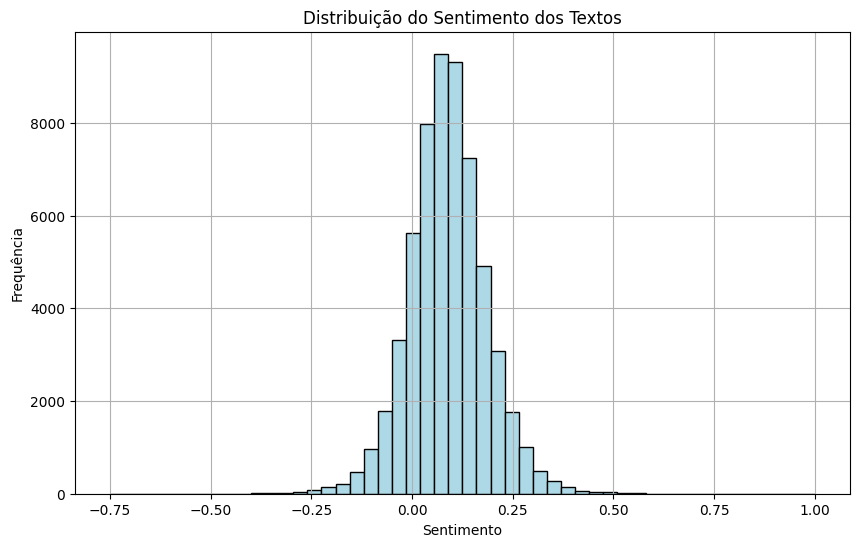

In [ ]:
from textblob import TextBlob

# Função para calcular o sentimento de um texto usando TextBlob
def calculate_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

# Calcular o sentimento para cada texto em combined_data
sentiments = combined_data['text'].apply(calculate_sentiment)

# Configurações do gráfico
plt.figure(figsize=(10, 6))
plt.hist(sentiments, bins=50, color='lightblue', edgecolor='black')

# Adiciona rótulos e título
plt.xlabel('Sentimento')
plt.ylabel('Frequência')
plt.title('Distribuição do Sentimento dos Textos')

# Mostra o gráfico
plt.grid(True)
plt.show()


### **Análise de Distribuição de Textos**


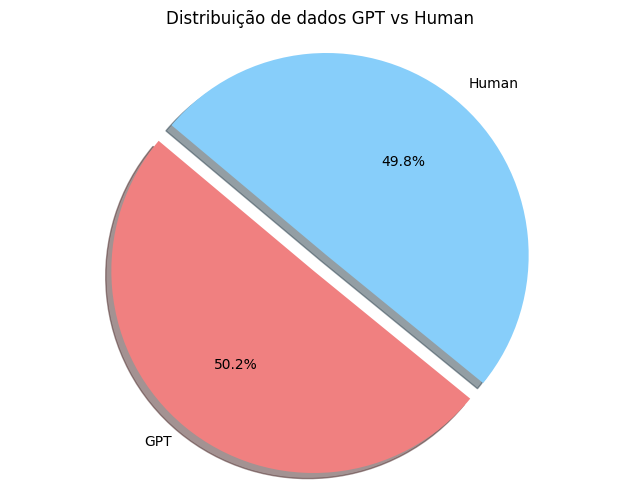

In [ ]:
value_counts = combined_data['value'].value_counts()

# Preparar os dados para o gráfico de pizza
labels = ['GPT', 'Human']
sizes = value_counts.values
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice (GPT)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribuição de dados GPT vs Human')
plt.show()